# Microsoft Movie Recommendation

## Introduction

Our stakeholders are Microsoft as they are currently trying to break into the film industry. There are many challenges that any studio would be facing and it is important to understand the business as it currently stands and what has been working in the market. We're going to go through a variety of data sets in order to have a better understanding of what factors are important in making a successful movie. If Microsoft follows our recommendations we believe they will soon be able to be a powerhouse in this industry like they have been in many others.

#### Importing Libraries

Importing various libraries that we'll be looking to use throughout the data cleaning and visualization process for the IMDB datasets. We also will look to assign all datasets to variables and open with Pandas' dataframes to interpret this data more easily.

In [127]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [128]:
# This was very helpful in pulling in all the IMDB datasets without having to
# refer back to the project information.

!ls zippedData

bom.movie_gross.csv.gz       imdb.title.ratings.csv.gz
imdb.name.basics.csv.gz      rt.movie_info.tsv.gz
imdb.title.akas.csv.gz       rt.reviews.tsv.gz
imdb.title.basics.csv.gz     tmdb.movies.csv.gz
imdb.title.crew.csv.gz       tn.movie_budgets.csv.gz
imdb.title.principals.csv.gz


In [129]:
# Opening up all the datasets related to the IMDB data provided as dataframes 
# with the use of pandas

df_tb = pd.read_csv('zippedData/imdb.title.basics.csv.gz')
df_tr = pd.read_csv('zippedData/imdb.title.ratings.csv.gz')
df_tc = pd.read_csv('zippedData/imdb.title.crew.csv.gz')
df_ta = pd.read_csv('zippedData/imdb.title.akas.csv.gz')
df_tp = pd.read_csv('zippedData/imdb.title.principals.csv.gz')
df_nb = pd.read_csv('zippedData/imdb.name.basics.csv.gz')

# After looking at the various heads of each dataset, it was apparent that we could use
# the title.basics and title.ratings files to come up with a average rating by genre.

# We could have joined additional tables however we didn't see the need to come
# up with a conclusion that we'd be able to provide to Microsoft.

df_combined = df_tb.join(df_tr, how='inner', lsuffix='_tb')
df_combined.head()

# An inner join made most since on the 'tconst' column, which was the index in both 
# tables as it seemed to be an unique identifier for individual movies in IMDB data.

,tconst_tb,primary_title,original_title,start_year,runtime_minutes,genres,tconst,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",tt10356526,8.3,31
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",tt10384606,8.9,559
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,tt1042974,6.4,20
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",tt1043726,4.2,50352
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",tt1060240,6.5,21


# First Impressions
___________________
I'm mostly interested in the ratings table as I've noticed that there are ratings that don't have many votes at all and it's possible that those ratings are skewing the dataset

In [130]:
df_tr

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [131]:
df_combined = df_tb.join(df_tr, how='inner', lsuffix='_tb')
df_combined

,tconst_tb,primary_title,original_title,start_year,runtime_minutes,genres,tconst,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",tt10356526,8.3,31
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",tt10384606,8.9,559
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,tt1042974,6.4,20
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",tt1043726,4.2,50352
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",tt1060240,6.5,21
...,...,...,...,...,...,...,...,...,...
73851,tt4206656,MarchFourth Marching Band in China,MarchFourth Marching Band in China,2014,66.0,"Documentary,Music",tt9805820,8.1,25
73852,tt4206658,El Bumbún,El Bumbún,2014,85.0,Drama,tt9844256,7.5,24
73853,tt4206724,70 Acres in Chicago: Cabrini Green,70 Acres in Chicago: Cabrini Green,2014,53.0,"Documentary,History,News",tt9851050,4.7,14
73854,tt4207014,Amante de lo ajeno,Amante de lo ajeno,2012,99.0,Drama,tt9886934,7.0,5


# Visualizing the situation
_____________________
Let's see what happens when we compare the rating to the number of votes

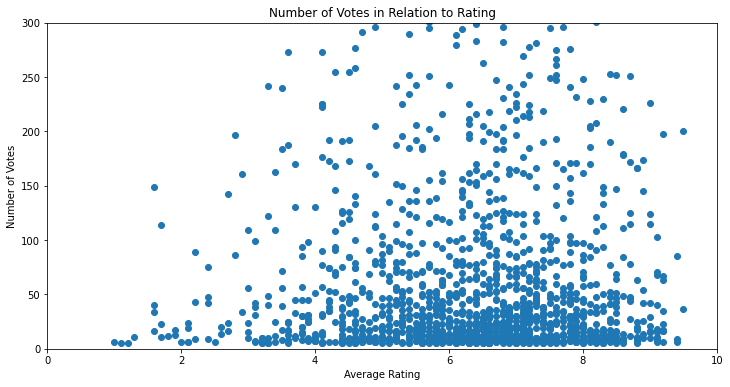

In [132]:
x = df_combined['numvotes'].sample(2000)
y = df_combined['averagerating'].sample(2000)

fig, ax = plt.subplots(figsize=(12, 6))
ax.set_ylim(0, 300)
ax.set_xlim(0, 10)

ax.set_xlabel("Average Rating")
ax.set_ylabel("Number of Votes")

ax.set_title("Number of Votes in Relation to Rating")

ax.scatter(y,x);

Unfortunately we can't tell much about what's going on, it seems like there's a lot of noise happening since there's a ton of data points that don't have a lot of votes. Let's pick an arbitrary number like 100 votes necessary and see how it affects some other comparisons

In [133]:
dropped_df = df_combined[df_combined['numvotes'] >100]
dropped_df

,tconst_tb,primary_title,original_title,start_year,runtime_minutes,genres,tconst,averagerating,numvotes
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",tt10384606,8.9,559
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",tt1043726,4.2,50352
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy,tt1069246,6.2,326
6,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller",tt1094666,7.0,1613
7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",tt1130982,6.4,571
...,...,...,...,...,...,...,...,...,...
73828,tt4205828,Progetto Hebi,Progetto Hebi,2014,57.0,"Documentary,Drama",tt9471952,7.1,338
73831,tt4205864,Abducted by Aliens: UFO Encounters of the 4th ...,Abducted by Aliens: UFO Encounters of the 4th ...,2014,60.0,Documentary,tt9558612,3.7,4057
73832,tt4205866,Three,Three,2015,NaN,Drama,tt9575726,7.7,161
73844,tt4206334,"Gonna Sip That Sip, Hit That Dip: The Emerging...","Gonna Sip That Sip, Hit That Dip: The Emerging...",2015,13.0,"Documentary,Music",tt9668598,5.5,317


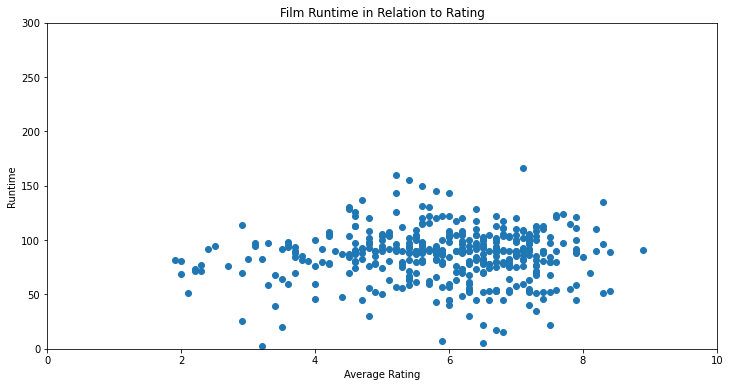

In [134]:
x = dropped_df['runtime_minutes'].sample(500)
y = dropped_df['averagerating'].sample(500)

fig, ax = plt.subplots(figsize=(12, 6))
ax.set_ylim(0, 300)
ax.set_xlim(0, 10)

ax.set_xlabel("Average Rating")
ax.set_ylabel("Runtime")

ax.set_title("Film Runtime in Relation to Rating")

ax.scatter(y,x);

We can see there is a slight positive relationship to rating with runtime, let's check it out with the dataset we didn't clean

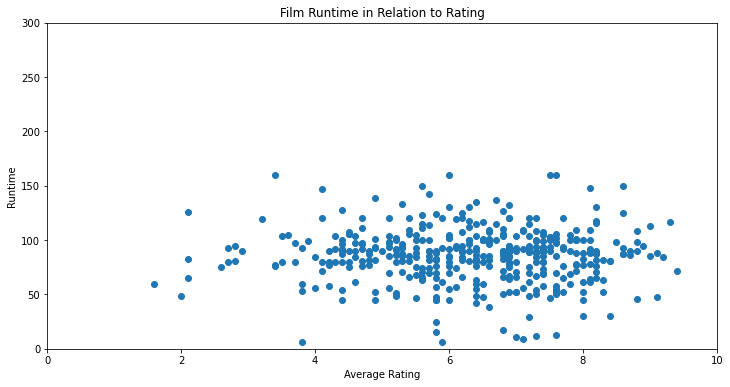

In [135]:
x = df_combined['runtime_minutes'].sample(500)
y = df_combined['averagerating'].sample(500)

fig, ax = plt.subplots(figsize=(12, 6))
ax.set_ylim(0, 300)
ax.set_xlim(0, 10)

ax.set_xlabel("Average Rating")
ax.set_ylabel("Runtime")

ax.set_title("Film Runtime in Relation to Rating")

ax.scatter(y,x);

Here we can't tell anything but this is important that we did need to clean it

In [136]:
dropped_df.corr()

,start_year,runtime_minutes,averagerating,numvotes
start_year,1.000000,0.033526,-0.002393,0.013855
runtime_minutes,0.033526,1.000000,0.001400,0.004530
averagerating,-0.002393,0.001400,1.000000,0.137307
numvotes,0.013855,0.004530,0.137307,1.000000


In [137]:
df_combined.corr()

,start_year,runtime_minutes,averagerating,numvotes
start_year,1.000000,0.017007,-0.003270,0.009165
runtime_minutes,0.017007,1.000000,0.005988,0.000846
averagerating,-0.003270,0.005988,1.000000,0.044478
numvotes,0.009165,0.000846,0.044478,1.000000


We were able to attain a better understanding of the correlation between the different columns by getting rid of excess noise

## Cleaning Up the Data

Before we start to look drawing conclusions from the data, we need to make sure we remove any NaN/"not a number" values within the data sets. We can quickly check this by running the df.info() to see how many values we have in each column and then decide how we want to take action.

In [138]:
print(df_combined.info())

print(df_combined.isna().any())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73856 entries, 0 to 73855
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst_tb        73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73853 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  61529 non-null  float64
 5   genres           72066 non-null  object 
 6   tconst           73856 non-null  object 
 7   averagerating    73856 non-null  float64
 8   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 5.6+ MB
None
tconst_tb          False
primary_title      False
original_title      True
start_year         False
runtime_minutes     True
genres              True
tconst             False
averagerating      False
numvotes           False
dtype: bool


Unfortunately, we have 3 columns within our combined data set that are missing values. We should look to deal with these values so that our data set is totally clean. As we can see from the second table above, we're missing data or have NaN values in: Original_Title, runtime_minutes & genres.

For the sake of our comparison here between Genre and Average rating, we're not concerned with the missing data in the original_title or runtime_minutes. 

Genre - It doesn't look like there is a way to grab this information for the missing values so we'll look to drop the ~1.3k records where the movie doesn't have a genre. It's roughly 2% of the entire data set so removing these records should impact our conclusion minimally if at all.

## Cleaning Up Genres


In [139]:
## Looking to drop any of the valeus in our dataframe where genre was entirely blank.

df_combined.dropna(subset=['genres'], inplace=True)

# We can then check the new dataframe to ensure that we're no
# longer missing values in the genres column.

df_combined.isna().any()

tconst_tb          False
primary_title      False
original_title     False
start_year         False
runtime_minutes     True
genres             False
tconst             False
averagerating      False
numvotes           False
dtype: bool

In [140]:
# It also looks like there are a number of movies with a very small amount of votes,
# so we'll make the assumption to remove anything with less than 100 votes
# to avoid some type of skewness of average rating.

df_combined = df_combined[(df_combined['numvotes'] > 100)]
df_combined.head(10)

,tconst_tb,primary_title,original_title,start_year,runtime_minutes,genres,tconst,averagerating,numvotes
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",tt10384606,8.9,559
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",tt1043726,4.2,50352
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy,tt1069246,6.2,326
6,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller",tt1094666,7.0,1613
7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",tt1130982,6.4,571
8,tt0139613,O Silêncio,O Silêncio,2012,NaN,"Documentary,History",tt1156528,7.2,265
9,tt0144449,Nema aviona za Zagreb,Nema aviona za Zagreb,2012,82.0,Biography,tt1161457,4.2,148
10,tt0146592,Pál Adrienn,Pál Adrienn,2010,136.0,Drama,tt1171222,5.1,8296
11,tt0154039,So Much for Justice!,Oda az igazság,2010,100.0,History,tt1174693,5.8,2381
12,tt0159369,Cooper and Hemingway: The True Gen,Cooper and Hemingway: The True Gen,2013,180.0,Documentary,tt1181840,7.0,5494


Now that we have a clean list of genres, we should now see what are all the unique genre values within the column, not taking into account the different permutations such as [Comedy, Drama] and [Drama, Horror]. I'd expect there to be 3 unique values: Comedy, Drama and Horror.

In [141]:
genre_list_total = []
unique_gen = []
total_genre = []

gen_unique = list((df_combined['genres'])) 
# Creating a list of the column from our dataframe

for genre in gen_unique:
    genre_list_total.append(genre.split(","))
    
# Then using that list we created to create a better organized list
# of lists of each movie's unique genres

for x in genre_list_total:
    total_genre = total_genre + x

# We then wanted to find out a list of the total unique genres in
# order to create a dictionary of keys of each genre and values of the mean
# of each average mean
    
unique_gen = list(set(total_genre))
unique_gen

['Music',
 'Drama',
 'Fantasy',
 'Adventure',
 'Western',
 'History',
 'Short',
 'Mystery',
 'Horror',
 'Family',
 'Biography',
 'Crime',
 'News',
 'Talk-Show',
 'Game-Show',
 'Action',
 'Adult',
 'Thriller',
 'Comedy',
 'Documentary',
 'Animation',
 'Reality-TV',
 'War',
 'Sport',
 'Musical',
 'Romance',
 'Sci-Fi']

In [142]:
ratings = {}

for x in unique_gen:
    y = df_combined[df_combined['genres'].str.contains(x)].mean().values[2]
    ratings[x]= y
    
df_ratings = pd.DataFrame.from_dict(ratings, orient='index')
df_ratings

,0
Music,5.899841
Drama,5.916470
Fantasy,5.965365
Adventure,5.962958
Western,5.854455
History,5.858322
Short,6.100000
Mystery,5.876500
Horror,5.907280
Family,5.905660


It's clear that we have some 'genres' included in the IMDB movie data that are more closely aligned with TV shows. Some of this data would be: Talk-show, News, Reality-TV, Game-Show. 

In [143]:
df_only_movies = df_ratings.drop(['Short', 'Talk-Show', 'News', 'Reality-TV', 'Game-Show'])
df_only_movies.reset_index()
top_10_movies = df_only_movies.sort_values(([0]), ascending=False)

top_10_movies

top_10 = top_10_movies.reset_index()
top_10

,index,0
0,Fantasy,5.965365
1,Adventure,5.962958
2,Action,5.925929
3,Documentary,5.920602
4,Drama,5.916470
5,Romance,5.909881
6,Horror,5.907280
7,Family,5.905660
8,Music,5.899841
9,Crime,5.895359


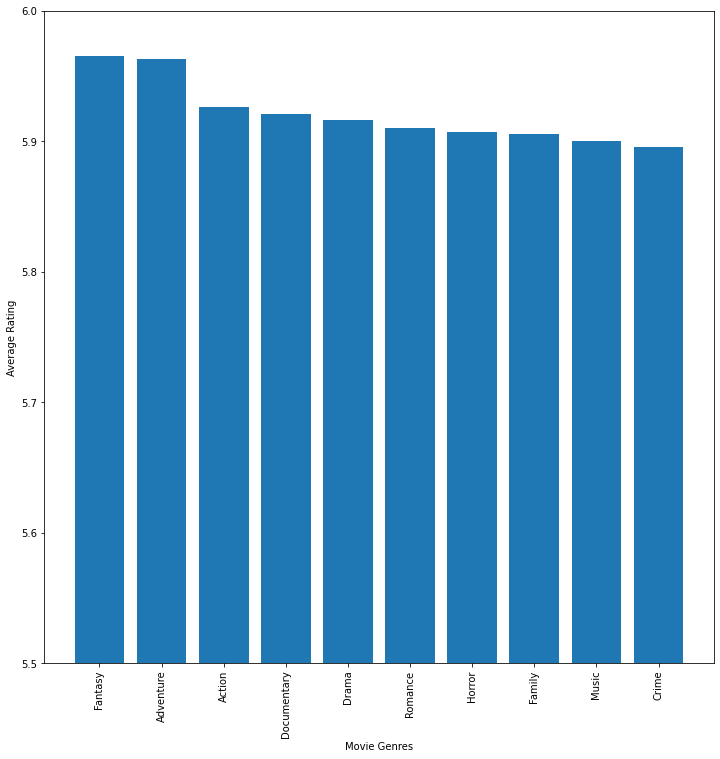

In [144]:
genre_ratings, ax = plt.subplots(figsize =(12,12))

abcd = top_10['index'][:10]
defg = top_10[0][:10]
ax.set_ylim(5.5, 6)
plt.xticks(rotation=90)
ax.bar(abcd, defg)
ax.set_xlabel('Movie Genres')
ax.set_ylabel('Average Rating');

In [145]:
df_adventure = df_combined[((df_combined['genres'].str.contains('Fantasy') & (df_combined['genres'].str.contains('Adventure'))))]
df_adventure.sort_values(['averagerating'], ascending=False)

,tconst_tb,primary_title,original_title,start_year,runtime_minutes,genres,tconst,averagerating,numvotes
54115,tt3181962,The Last Shepherd,The Last Shepherd,2015,94.0,"Adventure,Comedy,Fantasy",tt4131686,9.6,1339
45992,tt2734800,Purgatorio,Purgatorio,2012,100.0,"Adventure,Drama,Fantasy",tt2298537,8.2,105
24906,tt1999166,Alice in the Country of Hearts: Wonderful Wond...,Gekijouban Hâto no kuni no Arisu: Wonderful Wo...,2011,84.0,"Adventure,Animation,Fantasy",tt6319654,8.0,806
8927,tt1534564,Verbo,Verbo,2011,87.0,"Adventure,Fantasy",tt1699705,7.9,486
3077,tt10308500,Yu Yu Hakusho,Yu Yu Hakusho,2019,NaN,"Action,Adventure,Fantasy",tt3756824,7.7,130
...,...,...,...,...,...,...,...,...,...
67666,tt3847818,A2: The Anomaly,A2: The Anomaly,2014,71.0,"Adventure,Fantasy,Sci-Fi",tt1298643,3.1,483
2370,tt10239898,Star Wars: Battle for the Holocrons,Star Wars: Battle for the Holocrons,2020,NaN,"Action,Adventure,Fantasy",tt2078613,2.9,263
23933,tt1971371,Dia de Preto,Dia de Preto,2012,90.0,"Adventure,Fantasy,Mystery",tt5743888,2.8,246
176,tt0473075,Prince of Persia: The Sands of Time,Prince of Persia: The Sands of Time,2010,116.0,"Action,Adventure,Fantasy",tt1640219,2.8,114


# Conclusion

While it's not a landslide genre that takes the cake for what Microsoft should focus on, it's clear that in the last 11 years there has been a strong bias towards Fantasy and Adventure movies. While these are unique categories, a mix of the two genres would produce a strong movie. Some movies that seem to mix the two that have performed exceptionally and can be used as a starting point as to how to model your movie could be The Last Shepard (2015) and The Beast of the Bottomless Lake (2010).

# Ratings and Competition Insight

## Bom_df Data

In [146]:
# Read the file into the notebook
bom_df=pd.read_csv('zippedData/bom.movie_gross.csv.gz')

In [147]:
# Get a first look at the Data
bom_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [148]:
bom_df.shape

(3387, 5)

In [149]:
bom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


The foreign_gross column is missing data and it is also not in numeric form as it should be, those are the first few things I will address. It is in the object data type in part because it has some 'NaN'. Now I must analyze the data set and then decide how best to deal with this missing data. 

In [150]:
bom_df.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


In [151]:
# Check to see how many na is in the foreign gross column
bom_df['foreign_gross'].isna().sum()

1350

In [152]:
# Get rid of the missing data
bom_df.dropna(subset=['foreign_gross'],inplace=True)

In [153]:
# Check to see that it worked
bom_df['foreign_gross'].isna().sum()

0

I decided it would be best to drop the empty rows as I did not want to manipulate or possibly skew the data by using the mean or median. Next I would like to convert the column 'foreign_gross' to numeric form.

In [154]:
# Make the foreign gross column an integer
num_list=[]
for num in bom_df['foreign_gross']:
    x=num.replace(',','')
    y=float(x)
    num_list.append(y)

In [155]:
# Now put that list of it being integers into the data set in place of foreign gross
bom_df['foreign_gross']=num_list

Here I will take this column now in numeric form and add it to the domestic_gross column in a new column, named total_gross

In [156]:
bom_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010


In [157]:
# Make a new column called total_gross
bom_df['total_gross']=bom_df['domestic_gross']+bom_df['foreign_gross']

In [158]:
# Check to see that it came through correctly
bom_df.head()

,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08


In [159]:
# Sorted here by year and total gross to look at recent trends
bom_df.sort_values(by=['year','total_gross'],ascending=False)

,title,studio,domestic_gross,foreign_gross,year,total_gross
3080,Black Panther,BV,700100000.0,646900000.0,2018,1.347000e+09
3081,Jurassic World: Fallen Kingdom,Uni.,417700000.0,891800000.0,2018,1.309500e+09
3082,Incredibles 2,BV,608600000.0,634200000.0,2018,1.242800e+09
3083,Aquaman,WB,335100000.0,812700000.0,2018,1.147800e+09
3084,Bohemian Rhapsody,Fox,216400000.0,687200000.0,2018,9.036000e+08
...,...,...,...,...,...,...
230,It's a Wonderful Afterlife,UTV,NaN,1300000.0,2010,NaN
298,Celine: Through the Eyes of the World,Sony,NaN,119000.0,2010,NaN
302,White Lion,Scre.,NaN,99600.0,2010,NaN
306,Badmaash Company,Yash,NaN,64400.0,2010,NaN


Interesting, I see that there are some empty columns in domestic_gross that need to be dealt with, I will handle that now. Similary to the foreign_gross column, I will get rid of those rows

In [160]:
# Find how much missing data there is in domestic gross column
bom_df['domestic_gross'].isna().sum()

28

In [161]:
# Drop the missing 28 rows
bom_df.dropna(subset=['domestic_gross'],inplace=True)

In [162]:
#Confirm that they are gone
bom_df['domestic_gross'].isna().sum()

0

In [163]:
# sort by total gross and studio to see if there are any studios that appear to be doing best
bom_df=bom_df.sort_values(by=['total_gross','studio'],ascending=False)

In [164]:
bom_df.head(10)

,title,studio,domestic_gross,foreign_gross,year,total_gross
727,Marvel's The Avengers,BV,623400000.0,895500000.0,2012,1.518900e+09
1875,Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015,1.405400e+09
3080,Black Panther,BV,700100000.0,646900000.0,2018,1.347000e+09
328,Harry Potter and the Deathly Hallows Part 2,WB,381000000.0,960500000.0,2011,1.341500e+09
2758,Star Wars: The Last Jedi,BV,620200000.0,712400000.0,2017,1.332600e+09
3081,Jurassic World: Fallen Kingdom,Uni.,417700000.0,891800000.0,2018,1.309500e+09
1127,Frozen,BV,400700000.0,875700000.0,2013,1.276400e+09
2759,Beauty and the Beast (2017),BV,504000000.0,759500000.0,2017,1.263500e+09
3082,Incredibles 2,BV,608600000.0,634200000.0,2018,1.242800e+09
1128,Iron Man 3,BV,409000000.0,805800000.0,2013,1.214800e+09


There is something to notice when looking at which studios produce the highest grossing movies. Here we see that BV has 4 of the top 5 highest grossing movies in the dataset and 8 of the TOP 10

##  Show which studios make the best movies using visualization

While it is interesting that 8 of the top 10 movies come from one studio, 10 is not a great sample size to look at, lets widen our scope here and see if a scatter plot can help us visualize.

In [165]:
# Get the top 500 from studio and total gross
x_ax= bom_df['studio'][:500]
y_ax= bom_df['total_gross'][:500]

''

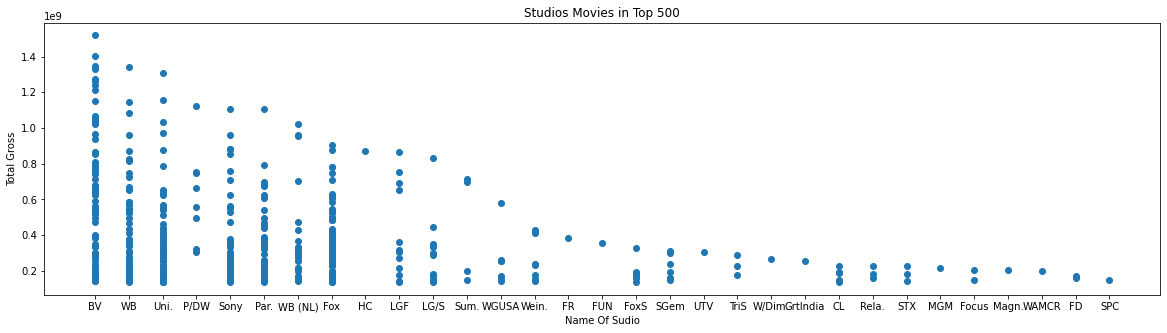

In [166]:
fig, ax = plt.subplots(figsize=(20,5))
ax.scatter(x=x_ax,y=y_ax)
ax.set_xlabel('Name Of Sudio')
ax.set_ylabel('Total Gross')
ax.set_title('Studios Movies in Top 500')
;

A scatter plot does help us see that the first three appear to be the main before a steep drop off but it does not look very good. It seems like a bar chart would better serve us here but lets find out if that is more visually appealling. 

''

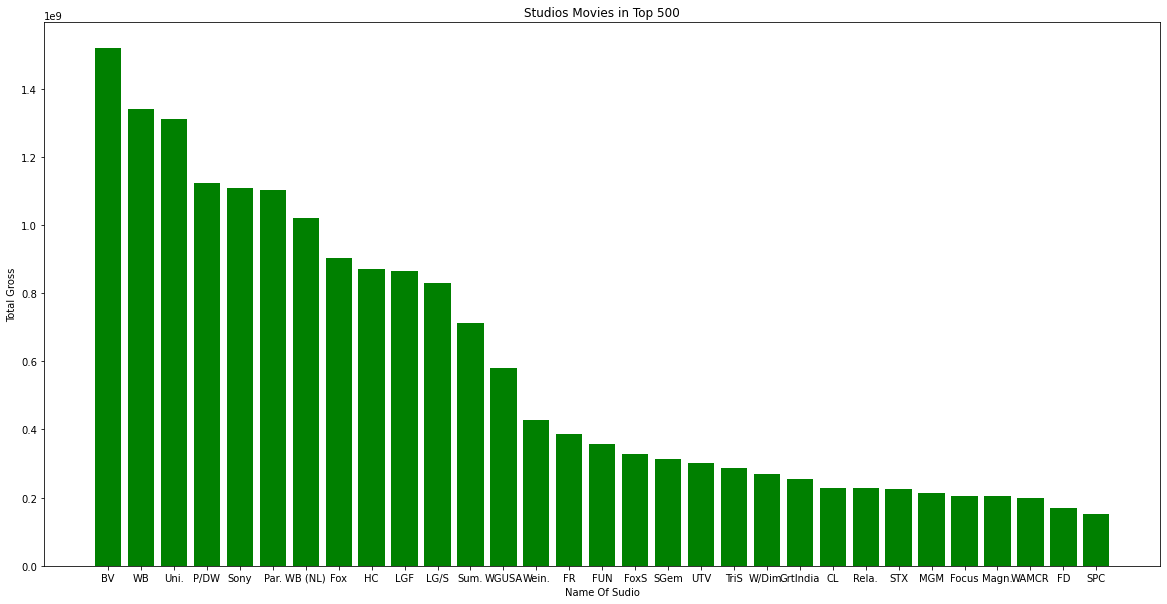

In [167]:
#Make a Bar chart in order to make the data clearer
fig, ax = plt.subplots(figsize=(20,10))
ax.bar(x=x_ax,height=y_ax,color='green')
ax.set_xlabel('Name Of Sudio')
ax.set_ylabel('Total Gross')
ax.set_title('Studios Movies in Top 500')
;

500 is a much better sample size and it appears as if BV is still far ahead and that there is quite the drop off after those top 3 studios in terms of total gross in the top 500 movies. So, what can we learn from this. Well I would look at the types of movies that BV makes and see if that genre or style is one that we can use. I will also examine WB and Universals top movies. First though let me look at data from the last three years quickly to make sure what we are seeing is consistent with recent trends.

In [168]:
sort_years=bom_df.sort_values(['year','total_gross'],ascending=False)

In [169]:
sort_years.head()

,title,studio,domestic_gross,foreign_gross,year,total_gross
3080,Black Panther,BV,700100000.0,646900000.0,2018,1.347000e+09
3081,Jurassic World: Fallen Kingdom,Uni.,417700000.0,891800000.0,2018,1.309500e+09
3082,Incredibles 2,BV,608600000.0,634200000.0,2018,1.242800e+09
3083,Aquaman,WB,335100000.0,812700000.0,2018,1.147800e+09
3084,Bohemian Rhapsody,Fox,216400000.0,687200000.0,2018,9.036000e+08


In [170]:
movies_2018=sort_years.loc[sort_years['year']==2018]
movies_2018.head()

,title,studio,domestic_gross,foreign_gross,year,total_gross
3080,Black Panther,BV,700100000.0,646900000.0,2018,1.347000e+09
3081,Jurassic World: Fallen Kingdom,Uni.,417700000.0,891800000.0,2018,1.309500e+09
3082,Incredibles 2,BV,608600000.0,634200000.0,2018,1.242800e+09
3083,Aquaman,WB,335100000.0,812700000.0,2018,1.147800e+09
3084,Bohemian Rhapsody,Fox,216400000.0,687200000.0,2018,9.036000e+08


In 2018 we see a mix of studios in the top 5 of total_gross. 4 of the top 5 are apart of franchises though and 4 out of 5 are also rated PG-13. The other one is rated PG.

In [171]:
movies_2017=sort_years.loc[sort_years['year']==2017]
movies_2017.head()

,title,studio,domestic_gross,foreign_gross,year,total_gross
2758,Star Wars: The Last Jedi,BV,620200000.0,712400000.0,2017,1.332600e+09
2759,Beauty and the Beast (2017),BV,504000000.0,759500000.0,2017,1.263500e+09
2761,Despicable Me 3,Uni.,264600000.0,770200000.0,2017,1.034800e+09
2762,Jumanji: Welcome to the Jungle,Sony,404500000.0,557600000.0,2017,9.621000e+08
2763,Spider-Man: Homecoming,Sony,334200000.0,546000000.0,2017,8.802000e+08


In 2017 we see the trend continue with a mix of studios in the top 5 highest grossing of the year. There are 3 out of 5 that are apart of franchises and 3 out of 5 rated PG-13 with the other two being PG.

In [172]:
movies_2016=sort_years.loc[sort_years['year']==2016]
movies_2016.head()

,title,studio,domestic_gross,foreign_gross,year,total_gross
2322,Captain America: Civil War,BV,408100000.0,745200000.0,2016,1.153300e+09
2323,Rogue One: A Star Wars Story,BV,532200000.0,523900000.0,2016,1.056100e+09
2324,Finding Dory,BV,486300000.0,542300000.0,2016,1.028600e+09
2325,Zootopia,BV,341300000.0,682500000.0,2016,1.023800e+09
2326,The Jungle Book (2016),BV,364000000.0,602500000.0,2016,9.665000e+08


Finally we will look at the 2016 data. Now this year appears to be owned by BV as they have all 5 of the highest grossing movies. Similar to the other years we have some more franchises as well as a mix of PG-13 and PG movies.

In [173]:
# Back to the whole data set
bom_df.head()

,title,studio,domestic_gross,foreign_gross,year,total_gross
727,Marvel's The Avengers,BV,623400000.0,895500000.0,2012,1.518900e+09
1875,Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015,1.405400e+09
3080,Black Panther,BV,700100000.0,646900000.0,2018,1.347000e+09
328,Harry Potter and the Deathly Hallows Part 2,WB,381000000.0,960500000.0,2011,1.341500e+09
2758,Star Wars: The Last Jedi,BV,620200000.0,712400000.0,2017,1.332600e+09


In [174]:
#Get studio, title and total gross alone. Then sort  by total gross in descending order
studios_gross=bom_df.drop(['domestic_gross','foreign_gross','year'],axis=1)
studios_gross=studios_gross.sort_values(by='total_gross',ascending=False)
studios_gross.head()

,title,studio,total_gross
727,Marvel's The Avengers,BV,1.518900e+09
1875,Avengers: Age of Ultron,BV,1.405400e+09
3080,Black Panther,BV,1.347000e+09
328,Harry Potter and the Deathly Hallows Part 2,WB,1.341500e+09
2758,Star Wars: The Last Jedi,BV,1.332600e+09


Now lets look at those top three studios from the bar chart we did above and see what else we can find out from these industry leaders.

In [175]:
#Get the BV movies alone
top_bv=studios_gross.loc[studios_gross['studio']=='BV']

In [176]:
top_bv.head(10)

,title,studio,total_gross
727,Marvel's The Avengers,BV,1.518900e+09
1875,Avengers: Age of Ultron,BV,1.405400e+09
3080,Black Panther,BV,1.347000e+09
2758,Star Wars: The Last Jedi,BV,1.332600e+09
1127,Frozen,BV,1.276400e+09
2759,Beauty and the Beast (2017),BV,1.263500e+09
3082,Incredibles 2,BV,1.242800e+09
1128,Iron Man 3,BV,1.214800e+09
2322,Captain America: Civil War,BV,1.153300e+09
0,Toy Story 3,BV,1.067000e+09


Interesting, so 6 out of 10 of these movies are rated PG-13 based on my own research. Those would be--- Marvel's: The Avengers, Avengers: Age of Ultron, Black Panther, Star Wars: The Last Jedi, Iron Man 3, Captain America: Civil War.
Then three others are rated PG. Those being, Frozen, Beauty and the Beast and Incredibles 2. Finally there is Toy Story 3 which got a G rating. These movies are mainly fiction though and many are part of franchises so that can also be another thing to note. Another thing that catches my eye is that half of these come from comic books to a certain extent. If one wants more information on any of these movies or other top movies that have come out from the studio they can find it at https://www.newsweek.com/20-highest-grossing-disney-movies-all-time-star-wars-frozen-1600957

In [177]:
#Get the WB movies all alone
top_wb=studios_gross.loc[studios_gross['studio']=='WB']

In [178]:
top_wb.head(10)

,title,studio,total_gross
328,Harry Potter and the Deathly Hallows Part 2,WB,1.341500e+09
3083,Aquaman,WB,1.147800e+09
729,The Dark Knight Rises,WB,1.084900e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,9.603000e+08
2328,Batman v Superman: Dawn of Justice,WB,8.737000e+08
3,Inception,WB,8.283000e+08
2767,Wonder Woman,WB,8.219000e+08
2329,Fantastic Beasts and Where To Find Them,WB,8.140000e+08
2331,Suicide Squad,WB,7.468000e+08
1134,Gravity,WB,7.232000e+08


Here are Warner Brothers top 10 grossing films. Interestingly enough they are ALL rated PG-13. We also have a lot more movies here that are apart of franchises. Then a few more movies based on comic books and some based on books like the Harry Potter franchise. For a deeper look at Warner Bros and some of their top movies ever, feel free to check out this link: https://www.listchallenges.com/warner-bros-top-100-highest-grossing-films

In [179]:
# Get the Universal movies all alone
top_uni=studios_gross.loc[studios_gross['studio']=='Uni.']

In [180]:
top_uni.head(10)

,title,studio,total_gross
3081,Jurassic World: Fallen Kingdom,Uni.,1.309500e+09
1876,Minions,Uni.,1.159400e+09
2761,Despicable Me 3,Uni.,1.034800e+09
1129,Despicable Me 2,Uni.,9.708000e+08
2327,The Secret Life of Pets,Uni.,8.755000e+08
1132,Fast & Furious 6,Uni.,7.887000e+08
1873,Jurassic World,Uni.,6.523010e+08
2334,Sing,Uni.,6.342000e+08
334,Fast Five,Uni.,6.261000e+08
1882,Fifty Shades of Grey,Uni.,5.710000e+08


Finally we look at the Universal studio data. Between the three studios they have by far the most variety of rating in their top 10. They have 1 movie rated R, Fifty Shades of Grey. Then 4 movies rated PG-13, those are JW: Fallen Kingdom, Fast & Furious 6, Fast 5 and Jurassic World. Then there are 5 movies rated PG, they are Minions, Despicable Me 2, Despicable Me 3, Secret Life of Pets and Sing. Notice that there are still a lot of franchises that show up here as well as a book that was turned into a movie. More information about these and other top Universal Studios movies can be found here: https://www.the-numbers.com/box-office-records/worldwide/all-movies/theatrical-distributors/universal

## Rotten Tomatoes Movie Info Data

Load the Rotten Tomatoes movie_info data frame and see what useful information can be found there.

In [181]:
# read the rotten tomatoes
rt_movieinfo=pd.read_csv('zippedData/rt.movie_info.tsv.gz',sep='\t')

In [182]:
rt_movieinfo.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


There is a lot of data cleaning that needs to be done before this data is ready to be manipulated, first examine and clean the data.

In [183]:
rt_movieinfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [184]:
#There appear to be many useful columns here, lets manipulate the data
rt_movieinfo.sort_values(by=['box_office'],ascending=False)

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
16,23,A fictional film set in the alluring world of ...,R,Drama,NaN,NaN,"Dec 20, 2013","Mar 18, 2014",$,"99,165,609",129 minutes,Sony Pictures
1510,1944,"In the 3D action-comedy The Green Hornet, Brit...",PG-13,Action and Adventure|Comedy|Science Fiction an...,Michel Gondry,Evan Goldberg|Seth Rogen,"Jan 14, 2011","May 3, 2011",$,"98,000,000",119 minutes,Sony Pictures
207,274,Natalie Portman stars in this western concerni...,R,Action and Adventure|Drama|Western,NaN,NaN,"Jan 29, 2016","Apr 26, 2016",$,"976,847",97 minutes,NaN
1469,1890,A misplaced sausage and his savory friends emb...,R,Animation|Comedy,Conrad Vernon|Greg Tiernan,Kyle Hunter|Ariel Shaffir|Seth Rogen|Evan Gold...,"Aug 12, 2016","Nov 8, 2016",$,"97,661,826",89 minutes,Sony Pictures
1323,1711,"Directed by Garry Marshall, The Princess Diari...",G,Comedy|Kids and Family,Garry Marshall,Shonda Rhimes,"Aug 11, 2004","Dec 14, 2004",$,"95,111,012",113 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1554,1995,"Special government agent James West, long on c...",PG-13,Action and Adventure|Comedy|Western,Barry Sonnenfeld,NaN,"Jun 30, 1999","Nov 30, 1999",NaN,NaN,107 minutes,Warner Bros. Pictures
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


The Dtype for box_office is in object form when it should be a float or integer, this is something that must be handled.

In [185]:
new_list=[]
for r in rt_movieinfo['box_office']:
    type(r)

In [186]:
# It appears that the numbers are in float form it is just the missing data that we must get rid of before we can
#analyze it
rt_movieinfo.isna().sum()

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

In [187]:
rt_movieinfo.shape

(1560, 12)

In [188]:
# Drop ALL the missing rows from the dataset.
rt_movieinfo=rt_movieinfo.dropna()

In [189]:
#Make sure they are gone
rt_movieinfo.isna().sum()

id              0
synopsis        0
rating          0
genre           0
director        0
writer          0
theater_date    0
dvd_date        0
currency        0
box_office      0
runtime         0
studio          0
dtype: int64

In [190]:
# Now examine what we have post getting rid of rows
rt_movieinfo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 235 entries, 1 to 1545
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            235 non-null    int64 
 1   synopsis      235 non-null    object
 2   rating        235 non-null    object
 3   genre         235 non-null    object
 4   director      235 non-null    object
 5   writer        235 non-null    object
 6   theater_date  235 non-null    object
 7   dvd_date      235 non-null    object
 8   currency      235 non-null    object
 9   box_office    235 non-null    object
 10  runtime       235 non-null    object
 11  studio        235 non-null    object
dtypes: int64(1), object(11)
memory usage: 23.9+ KB


In [191]:
#Make the box_office column an integer
box_office=rt_movieinfo['box_office']
box_office_list=[]
for num in box_office:
    a= num.replace(',','')
    b= a.replace('$','')
    box_office_list.append(int(b))
rt_movieinfo['box_office']=box_office_list

In [192]:
rt_movieinfo['box_office']

1         600000
6       41032915
7         224114
15       1039869
18      20518224
          ...   
1530    72700000
1537     1320005
1541    25335935
1542     1416189
1545       59371
Name: box_office, Length: 235, dtype: int64

In [193]:
rt_movieinfo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 235 entries, 1 to 1545
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            235 non-null    int64 
 1   synopsis      235 non-null    object
 2   rating        235 non-null    object
 3   genre         235 non-null    object
 4   director      235 non-null    object
 5   writer        235 non-null    object
 6   theater_date  235 non-null    object
 7   dvd_date      235 non-null    object
 8   currency      235 non-null    object
 9   box_office    235 non-null    int64 
 10  runtime       235 non-null    object
 11  studio        235 non-null    object
dtypes: int64(2), object(10)
memory usage: 23.9+ KB


We now only have 235 rows. This is not a particularly large data set but we will still see what kind of conclusions or trends we see within the data that we do have. We can still examine this data it is just good to be aware of how much data we are actually working with here.

In [194]:
#Get the mean box_office for each rating
rating_mean=rt_movieinfo.groupby(by=rt_movieinfo['rating']).mean()
rating_mean
rating_mean=rating_mean.drop(['id'],axis=1)
rating_mean
rating_mean=rating_mean.reset_index()

In [195]:
rating_mean

,rating,box_office
0,G,7.402788e+06
1,NC17,1.260219e+06
2,NR,6.376923e+05
3,PG,5.289280e+07
4,PG-13,6.872359e+07
5,R,2.394827e+07


## Give a visual of which rated movies do better at the box office

In [196]:
rating_mean.reset_index(inplace=True)
rating_mean
colors=[0,10,20,30,40,50]

''

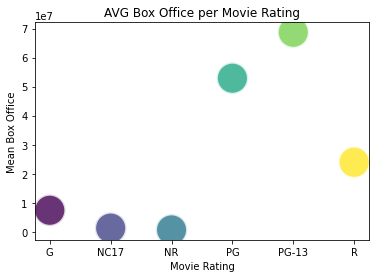

In [197]:
# Plot this data to get a visual idea of which rated movies do better
import seaborn as sns
fig, ax = plt.subplots()
sns.scatterplot(x=rating_mean['rating'],y=rating_mean['box_office'],c=colors,s=1000,alpha=.8)
ax.set_xlabel('Movie Rating')
ax.set_ylabel('Mean Box Office')
ax.set_title('AVG Box Office per Movie Rating')
;

This is interesting data we got from the seaborn scatterplot. However looking at this it appears a bar chart would suit us better here so I will now make one below to see if it is a nicer visual.

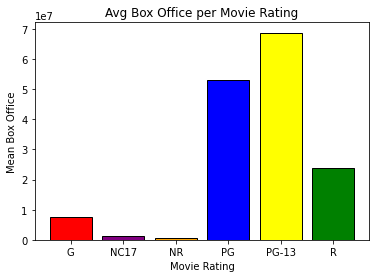

In [198]:
height = rating_mean['box_office']
bars = rating_mean['rating']
x_pos = np.arange(len(bars))

# Create bars 
plt.bar(x_pos, height,color=['red','purple','orange','blue','yellow','green'],edgecolor='black')

# Create names on the x-axis
plt.xticks(x_pos, bars)
plt.xlabel('Movie Rating')
plt.ylabel('Mean Box Office')
plt.title('Avg Box Office per Movie Rating')
# Show graph
plt.show()

Excellent, while the scatterplot was pretty clear this leaves no doubt and is extremely easy for anyone to interpret. Now let's go through the same process for the Maximum from each rating

In [199]:
#Now examine the Max box_office per rating to see if there is any discrepancies
rating_max=rt_movieinfo.groupby(by=rt_movieinfo['rating']).max()
rating_max

,id,synopsis,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
rating,,,,,,,,,,,
G,1965,The movie chronicles the adventures of a young...,Kids and Family|Musical and Performing Arts,Robert Ramirez,Robert Ramirez|Rhett Reese,"Jul 26, 2000","Oct 31, 2000",$,18013938,95 minutes,Warner Bros. Pictures
NC17,1567,Lust is in the air on Harford Road and Sylvia ...,Comedy,John Waters,John Waters,"Sep 24, 2004","Jun 14, 2005",$,1260219,89 minutes,New Line Cinema
NR,1981,With the recent assault on Berlusconi in Milan...,Drama|Horror|Mystery and Suspense,Rakeysh Omprakash Mehra|Rakeysh Omprakesh Mehra,Prasoon Joshi,"Oct 5, 2012","Sep 7, 2010",$,1626289,95 minutes,Variance Films
PG,1968,Youthful wizard Harry Potter returns to the sc...,Science Fiction and Fantasy,Uli Edel|Ulrich Edel,Timothy Hyde Harris|David Bowers|Timothy Harris,"Sep 29, 2006","Sep 5, 2017",$,261835892,97 minutes,Warner Bros. Pictures
PG-13,1980,When five struggling single moms put aside the...,Horror|Mystery and Suspense|Science Fiction an...,Yimou Zhang,Woody Allen,"Sep 30, 2005","Sep 30, 2003",$,303001229,99 minutes,Weinstein Co.
R,1985,Writer/director Lisa Cholodenko follows up her...,Horror|Mystery and Suspense|Science Fiction an...,Yimou Zhang,Yan Geling,"Sep 6, 2013","Sep 9, 2014",$,368000000,99 minutes,Wrekin Hill Entertainment


In [200]:
#Get rating and box_office alone
rating_max=rating_max.drop(['synopsis','genre','id','director','writer',
                            'theater_date','dvd_date','runtime'],axis=1)

In [201]:
# reset index
rating_max=rating_max.reset_index()
rating_mean

,index,rating,box_office
0,0,G,7.402788e+06
1,1,NC17,1.260219e+06
2,2,NR,6.376923e+05
3,3,PG,5.289280e+07
4,4,PG-13,6.872359e+07
5,5,R,2.394827e+07


''

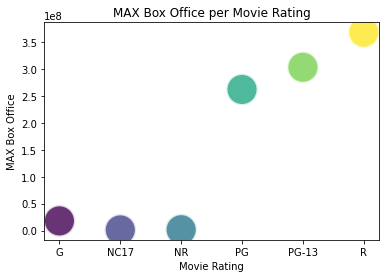

In [202]:
# Now with the Max box_office per movie rating we can visualize the possible ceiling of each movie rating
fig, ax = plt.subplots()
sns.scatterplot(x=rating_max['rating'],y=rating_max['box_office'],c=colors,s=1000,alpha=.8)
ax.set_xlabel('Movie Rating')
ax.set_ylabel('MAX Box Office')
ax.set_title('MAX Box Office per Movie Rating')
;

Once again we will now make a bar chart to make this visual more readable.

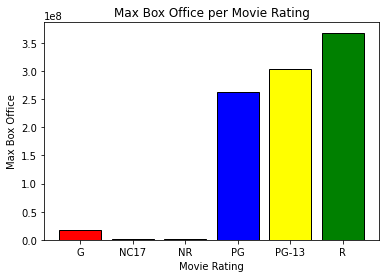

In [203]:
height = rating_max['box_office']
bars = rating_max['rating']
x_pos = np.arange(len(bars))

# Create bars 
plt.bar(x_pos, height,color=['red','purple','orange','blue','yellow','green'],edgecolor='black')

# Create names on the x-axis
plt.xticks(x_pos, bars)
plt.xlabel('Movie Rating')
plt.ylabel('Max Box Office')
plt.title('Max Box Office per Movie Rating')
# Show graph
plt.show()

Great! This is very clear and it seems like in terms of ceiling the R rating becomes a much bigger player. Seemingly it is riskier than the others but can come with high reward.

## Import the tmbd data to see if it can help support our findings

In [204]:
# Read the file into notebook
tnmovie_budgets= pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
tnmovie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [205]:
tnmovie_budgets.shape

(5782, 6)

In [206]:
# WOW this data is already fairly clean and does not appear to be missing anything
tnmovie_budgets.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [207]:
tnmovie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


There are a varierty of objects that need to be moved to numeric form so that they can be manipulated properly. Let's change production_budget,domestic_gross and worldwide_gross to integers.

In [208]:
# Change production_budget to integer
Production_budget=tnmovie_budgets['production_budget']
production_budget_list=[]
for num in Production_budget:
    a= num.replace(',','')
    b= a.replace('$','')
    production_budget_list.append(int(b))
tnmovie_budgets['production_budget']=Production_budget

In [209]:
tnmovie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [210]:
tnmovie_budgets['production_budget'].head()

0    $425,000,000
1    $410,600,000
2    $350,000,000
3    $330,600,000
4    $317,000,000
Name: production_budget, dtype: object

In [211]:
# Add the new integers to the production_budget column in place of the strings
tnmovie_budgets['production_budget']=production_budget_list

In [212]:
# Change worldwide_gross to integer
worldwide_gross= tnmovie_budgets['worldwide_gross']
worldwide_gross_list=[]
for num in worldwide_gross:
    a= num.replace(',','')
    b= a.replace('$','')
    worldwide_gross_list.append(int(b))

In [213]:
len(worldwide_gross_list)

5782

In [214]:
len(tnmovie_budgets['worldwide_gross'])

5782

In [215]:
#Add the new integers to the worldwide_gross column in place of the strings
tnmovie_budgets['worldwide_gross']=worldwide_gross_list

In [216]:
tnmovie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,"$760,507,625",2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,"$241,063,875",1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,"$42,762,350",149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,"$459,005,868",1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,"$620,181,382",1316721747


In [217]:
# Change domestic_gross column to integer
domestic_gross= tnmovie_budgets['domestic_gross']
domestic_gross_list=[]
for num in domestic_gross:
    a= num.replace(',','')
    b= a.replace('$','')
    domestic_gross_list.append(int(b))

In [218]:
len(tnmovie_budgets['domestic_gross'])

5782

In [219]:
len(domestic_gross_list)

5782

In [220]:
#Add the new integers to the production_budget column in place of the strings
tnmovie_budgets['domestic_gross']=domestic_gross_list

In [221]:
tnmovie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [222]:
tnmovie_budgets['worldwide_profit']= tnmovie_budgets['worldwide_gross']-tnmovie_budgets['production_budget']

In [223]:
tnmovie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,worldwide_profit
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747


In [224]:
#Sort by the worst performing movies and rename to maintain original
sorted_by_worst_performing=tnmovie_budgets.sort_values(by=['worldwide_profit'])

In [225]:
##Sort by the best performing movies and rename to maintain original
sorted_by_best_performing=tnmovie_budgets.sort_values(by=['worldwide_profit'],ascending=False)

In [226]:
sorted_by_best_performing.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,worldwide_profit
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279
42,43,"Dec 19, 1997",Titanic,200000000,659363944,2208208395,2008208395
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220
33,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,1433854864


In [227]:
sorted_by_best_performing=sorted_by_best_performing.drop(['release_date','id','production_budget','domestic_gross'
                                                          ,'worldwide_gross'],axis=1)

In [228]:
sorted_by_best_performing.head()

,movie,worldwide_profit
0,Avatar,2351345279
42,Titanic,2008208395
6,Avengers: Infinity War,1748134200
5,Star Wars Ep. VII: The Force Awakens,1747311220
33,Jurassic World,1433854864


In [229]:
sorted_by_best_performing.shape

(5782, 2)

In [230]:
sorted_by_best_performing.set_index(['movie'])

,worldwide_profit
movie,
Avatar,2351345279
Titanic,2008208395
Avengers: Infinity War,1748134200
Star Wars Ep. VII: The Force Awakens,1747311220
Jurassic World,1433854864
...,...
Town & Country,-94635231
Men in Black: International,-106900000
Mars Needs Moms,-110450242


In [231]:
#Plot the top ten movies by worldwide profit to see how they relate to our findings from the Rotten Tomatoes data and 
# The Bom data
holdx=sorted_by_best_performing['movie'][:10]
holdy=sorted_by_best_performing['worldwide_profit'][:10]

''

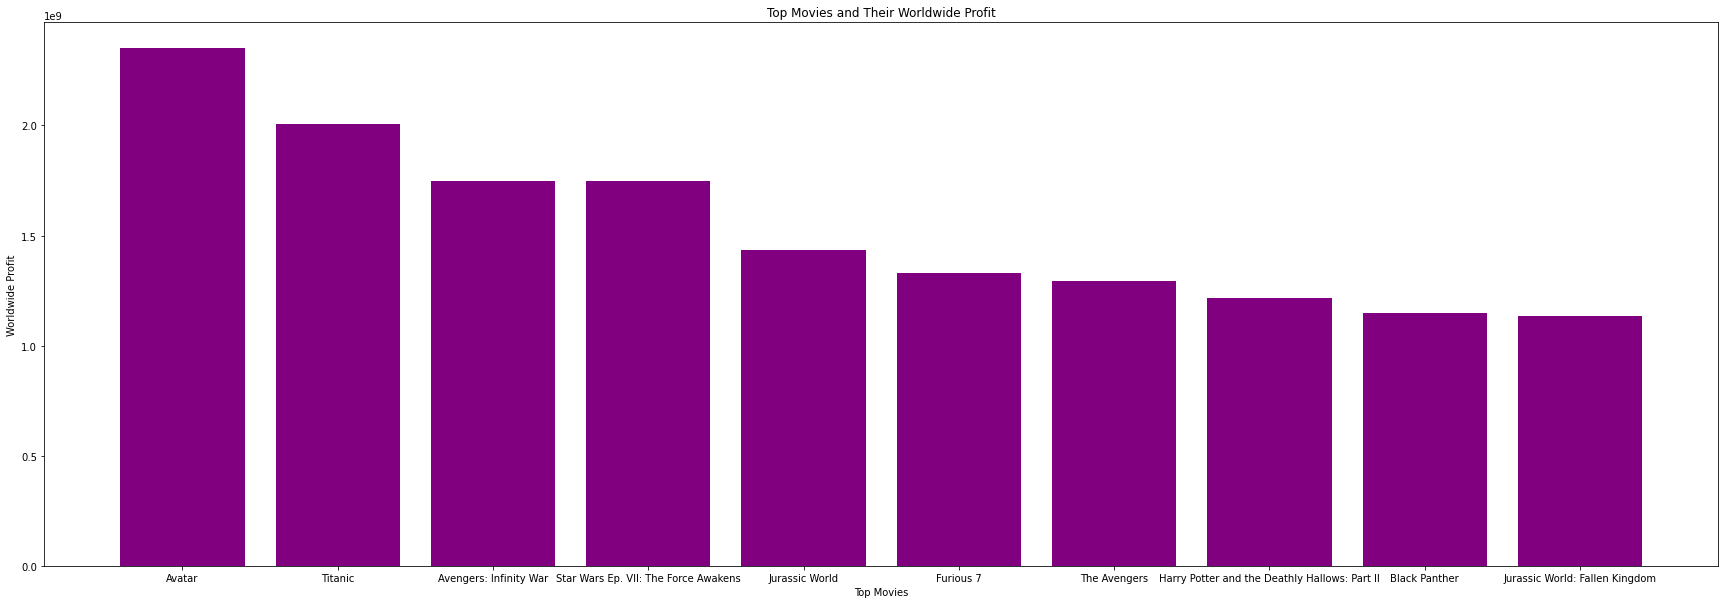

In [232]:
fig, ax = plt.subplots(figsize=(30,10))
ax.bar(x=holdx,height=holdy,color='purple')
ax.set_xlabel('Top Movies')
ax.set_ylabel('Worldwide Profit')
ax.set_title('Top Movies and Their Worldwide Profit')
;

## Conclusion

Interesting, we actually see that this lines up really well with what the other two data sets would of made us believe. ALL of these movies are rated PG-13 and almost ALL of them are part of a franchise. Then we also see the appearance of movies based on books/comics very prevalent here as well. Based on the findings from all these data sets I would recommend that Microsoft make a movie rated between PG and R. PG-13 being my main recommendation with R being if they want to take on a bit more risk but with perhaps higher reward. PG only if they specifically wanted to be family friendly and were deciding between G and PG. In which case I would strongly urge them to make it a PG movie. Then I would recommend it be based on a popular book or comic books as the built in audiuence you get has proven to be invaluable as shown in the data. Then finally if I was advising Microsoft more long term rather than for just one movie I would recommend they decide on something with franchise potential rather than a standalone movie.

## Cost Against Earnings

In [233]:
#Import file as a variable and take a basic look at the data contained
tmdbmovies= pd.read_csv('zippedData/tmdb.movies.csv.gz')
tmdbmovies.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [234]:
#turn the column into a list that can be used for graph
vote_count=tmdbmovies['vote_count']
vote_count_list=[]
for num in vote_count:
    vote_count_list.append(num)

In [235]:
#turn the column into a list that can be used for graph
popularity=tmdbmovies['popularity']
popularity_list=[]
for num in popularity:
    popularity_list.append(num)
popularity_list[0:5]

[33.533, 28.734, 28.515, 28.005, 27.92]

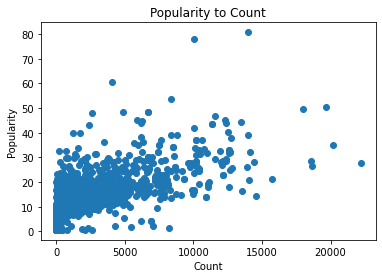

In [236]:
#plot production budget against domestic gross
fig, (ax) = plt.subplots()
ax.scatter(vote_count_list, popularity_list)
ax.set_title('Popularity to Count')
ax.set_xlabel('Count')
ax.set_ylabel('Popularity');

In [237]:
count_corr=np.corrcoef(vote_count_list, popularity_list)
count_corr

array([[1.        , 0.69484937],
       [0.69484937, 1.        ]])

There is a positive correlation between vote counts and popularity. Meaning that the more a movie is enjoyed (described by the popularity metric) the more people consume it. However we are unable to assume causation. So it is unclear if the popularity drives the count or if the counts drive the popularity. Are people deciding or are group dynamics driving indiviual opinion?

In [238]:
#Import file as a variable and take a basic look at the data contained
tnmovie_budgets= pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
tnmovie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


The tnmovie_budgets file provides the information I am useing for my analysis.

In [239]:
#turn the column into a list that can be used for graph
Production_budget=tnmovie_budgets['production_budget']
production_budget_list=[]
for num in Production_budget:
    a= num.replace(',','')
    b= a.replace('$','')
    production_budget_list.append(int(b))
mean_budget=sum(production_budget_list)/len(production_budget_list)

In [240]:
#turn the column into a list that can be used for graph
worldwide_gross= tnmovie_budgets['worldwide_gross']
worldwide_gross_list=[]
for num in worldwide_gross:
    a= num.replace(',','')
    b= a.replace('$','')
    worldwide_gross_list.append(int(b))
mean_worldwide_gross= sum(worldwide_gross_list)/ len(worldwide_gross_list)

In [241]:
#turn the column into a list that can be used for graph
domestic_gross= tnmovie_budgets['domestic_gross']
domestic_gross_list=[]
for num in domestic_gross:
    a= num.replace(',','')
    b= a.replace('$','')
    domestic_gross_list.append(int(b))
mean_domestic_gross= sum(domestic_gross_list)/len(domestic_gross_list)

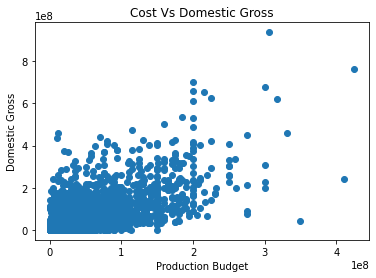

In [242]:
#plot production budget against domestic gross
fig, (ax) = plt.subplots()
ax.scatter(production_budget_list, domestic_gross_list)
ax.set_title('Cost Vs Domestic Gross')
ax.set_xlabel('Production Budget')
ax.set_ylabel('Domestic Gross');

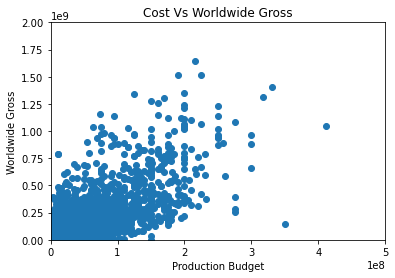

In [243]:
#plot production budget against worldwide gross
fig, (ax) = plt.subplots()
ax.scatter(production_budget_list, worldwide_gross_list)
ax.set_title('Cost Vs Worldwide Gross')
ax.set_xlabel('Production Budget')
ax.set_ylabel('Worldwide Gross')
ax.set_xlim(0, 500000000)
ax.set_ylim(0, 2000000000);

In [244]:
#find how correlated budget is to domestic gross
cor_var_domestic=np.corrcoef(production_budget_list, domestic_gross_list)
cor_var_domestic

array([[1.        , 0.68568184],
       [0.68568184, 1.        ]])

In [245]:
#find how correlated budget is to worldwide gross
cor_var_worldwide=np.corrcoef(production_budget_list, worldwide_gross_list)
cor_var_worldwide

array([[1.        , 0.74830598],
       [0.74830598, 1.        ]])

## Conclusion

The more money one spends the more they recieve in returns. There is little increased value after spending 20 mil. Investing has more payback on global market than a domestic market, there is a higher correlation; .74830598 to .68568184. (A strong correlation is absolute value of .75 to 1 and moderate correlation is .50 to .75)

# Final Conclusion

After looking through the data we have, we are confident in making three recommendations to Microsoft that we beleive will be of great use to them in their journey to enter the film industry:

1. Genres that have performed the best seem to be Fantasy & Adventure films.


2. The films that do consistently best are PG-13 rated films, their ceiling remains high and they are also a safe pick. Another thing to note is that movies based on books/comics and especially franchise films find their way to the top far more often than other films.


3. There is a positive correlation between your investment in a film and your earnings. This effect is greater in a global market as opposed to a domestic one.

It's important to note that trends do come and go though. That being said, working with the current data that is available to us we see these three recommendations being potentially key to Microsofts ability to break into the film industry and hopefully someday becoming a household name.
